In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"Data\\india_data\\nifty50_data.csv")
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df = df.sort_values("Date", ascending=True)
df = df.reset_index()
df.head(5)

,index,Index Name,Date,PE,PB,Div Yield,Close,Earnings
0,6513,NIFTY 50,1999-01-01,11.62,2.07,1.83,890.80,76.66
1,6512,NIFTY 50,1999-01-04,11.72,2.08,1.81,897.80,76.60
2,6511,NIFTY 50,1999-01-05,11.84,2.11,1.79,907.20,76.62
3,6510,NIFTY 50,1999-01-06,12.11,2.16,1.75,928.25,76.65
4,6509,NIFTY 50,1999-01-07,12.46,2.22,1.71,954.70,76.62


In [4]:
median_pe = np.median(df["PE"])

In [5]:
median_pe

np.float64(20.82)

In [6]:
pe_deviations = np.array([])
for i in df["PE"]:
    pe_deviations = np.append(pe_deviations, (i-median_pe))

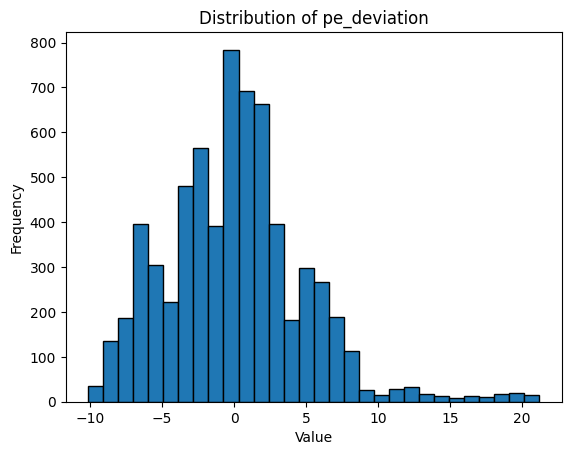

In [7]:
plt.hist(pe_deviations, bins=30, edgecolor='black')
plt.title('Distribution of pe_deviation')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [8]:
df_filtered = df[df["Date"].dt.year >= 2005]
df_filtered = df_filtered.copy()

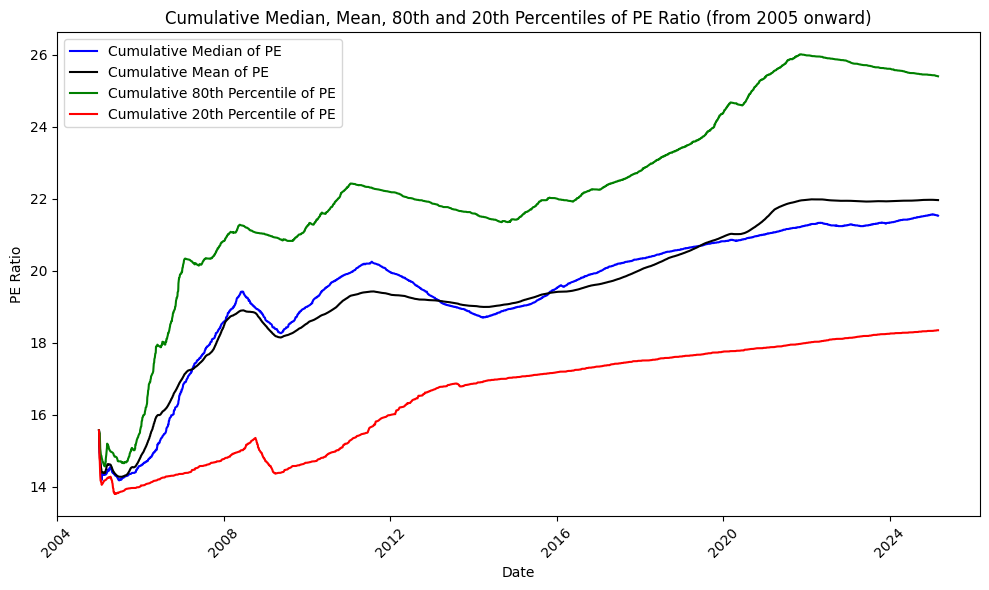

In [9]:
df_filtered["Cumulative_Median_PE"] = df_filtered["PE"].expanding(min_periods=1).median()
df_filtered["Cumulative_Mean_PE"] = df_filtered["PE"].expanding(min_periods=1).mean()
df_filtered["Cumulative_80th_Percentile_PE"] = df_filtered["PE"].expanding(min_periods=1).quantile(0.8)
df_filtered["Cumulative_20th_Percentile_PE"] = df_filtered["PE"].expanding(min_periods=1).quantile(0.2)

plt.figure(figsize=(10, 6))

plt.plot(df_filtered["Date"], df_filtered["Cumulative_Median_PE"], label="Cumulative Median of PE", color='blue')
plt.plot(df_filtered["Date"], df_filtered["Cumulative_Mean_PE"], label="Cumulative Mean of PE", color='black')
plt.plot(df_filtered["Date"], df_filtered["Cumulative_80th_Percentile_PE"], label="Cumulative 80th Percentile of PE", color='green')
plt.plot(df_filtered["Date"], df_filtered["Cumulative_20th_Percentile_PE"], label="Cumulative 20th Percentile of PE", color='red')

plt.title("Cumulative Median, Mean, 80th and 20th Percentiles of PE Ratio (from 2005 onward)")
plt.xlabel("Date")
plt.ylabel("PE Ratio")
plt.xticks(rotation=45)
plt.tight_layout()

plt.legend()
plt.show()

In [10]:
print(df_filtered.shape)

(5003, 12)


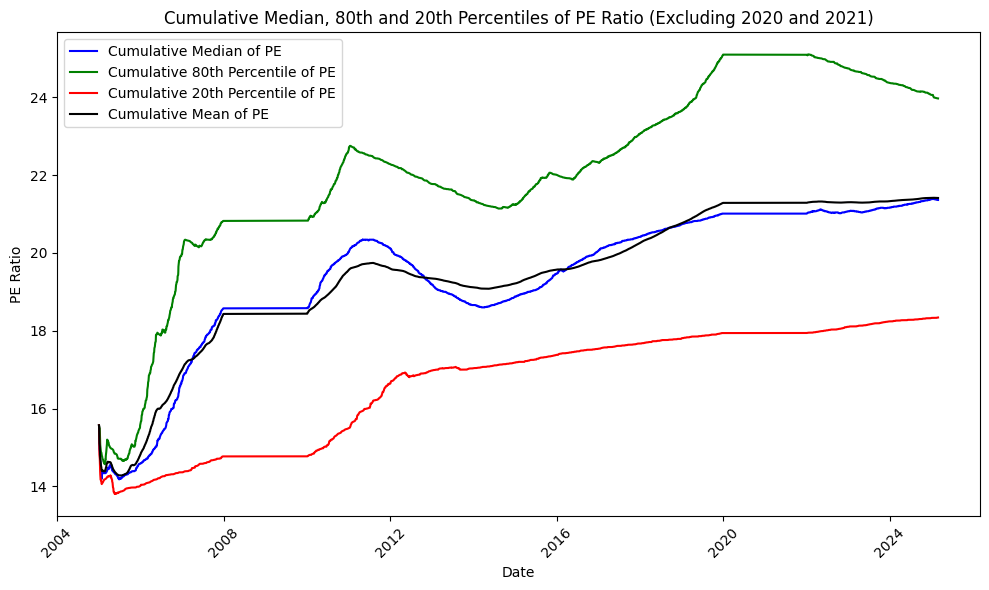

In [11]:
df_filtered = df_filtered[~df_filtered["Date"].dt.year.isin([2008,2009,2020, 2021])]

cumulative_median_pe = []
cumulative_80th_percentile_pe = []
cumulative_20th_percentile_pe = []
cumulative_mean_pe = []

for i in range(len(df_filtered)):
    current_data = df_filtered["PE"][:i+1]
    cumulative_median_pe.append(np.median(current_data))
    cumulative_80th_percentile_pe.append(np.percentile(current_data, 80))
    cumulative_20th_percentile_pe.append(np.percentile(current_data, 20))
    cumulative_mean_pe.append(np.mean(current_data))

df_filtered["Cumulative_Median_PE"] = cumulative_median_pe
df_filtered["Cumulative_80th_Percentile_PE"] = cumulative_80th_percentile_pe
df_filtered["Cumulative_20th_Percentile_PE"] = cumulative_20th_percentile_pe
df_filtered["Cumulative_Mean_PE"] = cumulative_mean_pe

plt.figure(figsize=(10, 6))

plt.plot(df_filtered["Date"], df_filtered["Cumulative_Median_PE"], label="Cumulative Median of PE", color='blue')
plt.plot(df_filtered["Date"], df_filtered["Cumulative_80th_Percentile_PE"], label="Cumulative 80th Percentile of PE", color='green')
plt.plot(df_filtered["Date"], df_filtered["Cumulative_20th_Percentile_PE"], label="Cumulative 20th Percentile of PE", color='red')
plt.plot(df_filtered["Date"], df_filtered["Cumulative_Mean_PE"], label="Cumulative Mean of PE", color='black')

plt.title("Cumulative Median, 80th and 20th Percentiles of PE Ratio (Excluding 2020 and 2021)")
plt.xlabel("Date")
plt.ylabel("PE Ratio")
plt.xticks(rotation=45)
plt.tight_layout()

plt.legend()
plt.show()

In [12]:
print(df_filtered.shape)

(4014, 12)


In [32]:
p80 = np.percentile(df['PE'], 70)
p20 = np.percentile(df['PE'], 30)
overval_days = []
underval_days = []
for index, row in df.iterrows():
    if row["PE"] >= p80:
        start_date = row["Date"]
        for i in range(index + 1, len(df)):
            if df.loc[i, "PE"] < p80:
                end_date = df.loc[i, "Date"]
                days_to_revert = (end_date - start_date).days
                overval_days.append(days_to_revert)
                break
    elif row["PE"] <= p20:
            start_date = row["Date"]
            for i in range(index + 1, len(df)):
                if df.loc[i, "PE"] > p20:
                    end_date = df.loc[i, "Date"]
                    days_to_revert = (end_date - start_date).days
                    underval_days.append(days_to_revert)
                    break
    else : 
        continue

In [33]:
np.mean(overval_days)

np.float64(310.75446656457376)

In [34]:
np.mean(underval_days)

np.float64(181.54089979550102)

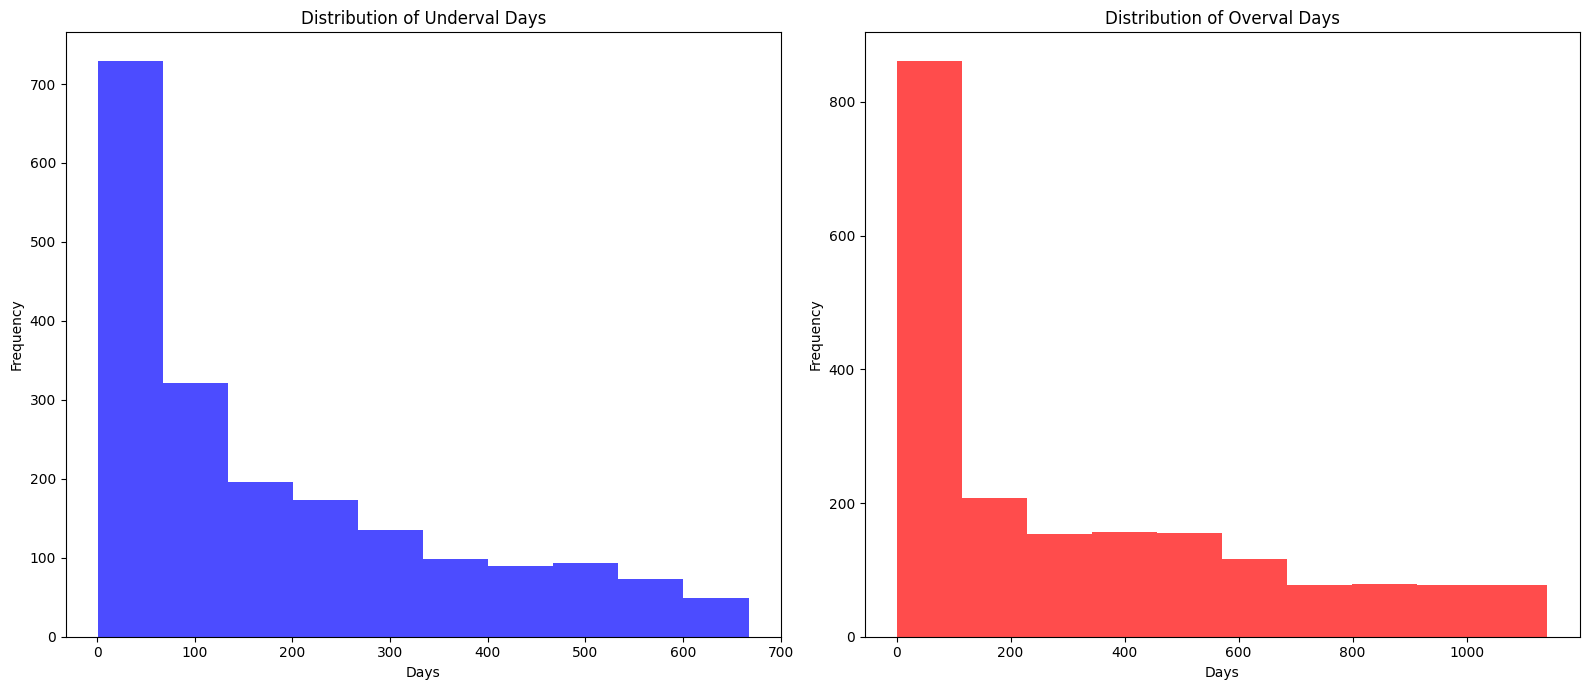

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(16,7))  # 2 rows, 1 column
axs[0].hist(underval_days, bins=10, color='blue', alpha=0.7)
axs[0].set_title('Distribution of Underval Days')
axs[0].set_xlabel('Days')
axs[0].set_ylabel('Frequency')
axs[1].hist(overval_days, bins=10, color='red', alpha=0.7)
axs[1].set_title('Distribution of Overval Days')
axs[1].set_xlabel('Days')
axs[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()